#### Titanic 승객의 생존여부 예측하기
1. Data Load
2. Data Preprocessing(전처리)
3. Visualization (시각화)
4. Feature Engineering (독립변수 Selection)
5. GridSearchCV를 사용해서 Training Dataset Model의 best parameter 찿기
6. Best Parameter를 적용한 Model 생성해서, 학습(fit) , 예측(predict) 하기
7. Submission(제출)

### 1. Data Load

In [1]:
import pandas as pd

train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(train.shape)
print(train.info())
train.head()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# null data 건수 확인
print('훈련\n', train.isnull().sum())

훈련
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
#컬럼명 확인
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### 2. Data Preprocessing
* Sex(성별) : 문자로 숫자로 변경 male은 0으로, female 1
* Embarked(선착장) : C, S, Q  One Hot Encoding 범주형 데이터 처리
* Age,Fare : null data 처리


In [7]:
# 성별 컬럼 데이터 확인
print(train['Sex'].unique())
train['Sex'].value_counts()

['male' 'female']


male      577
female    314
Name: Sex, dtype: int64

In [8]:
# 훈련데이터와 테스트데이터의 전처리를 한번에 하기 위해
train_test_data = [train, test]

In [9]:
for data in train_test_data:
    # male은 0, female은 1
    data.loc[data['Sex'] == 'male','Sex'] = 0
    data.loc[data['Sex'] == 'female','Sex'] = 1    

print(train['Sex'].value_counts())        
print(test['Sex'].value_counts())        

0    577
1    314
Name: Sex, dtype: int64
0    266
1    152
Name: Sex, dtype: int64


In [10]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
# Embarked 컬럼 데이터 확인
for data in train_test_data:
    print(data['Embarked'].unique())
    print(data['Embarked'].value_counts())

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64
['Q' 'S' 'C']
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [12]:
train['Embarked'].isnull().sum()

2

#### One Hot Encoding
* 범주형 데이터 인코딩 
* C, S, Q => 0, 1, 2
* 범주형 데이터 갯수만큼의 컬럼을 새로 생성 Embarked_C, Embarked_S, Embarked_Q
* C [True,False,False], S [False, True, False] , Q[False, False, True]

In [13]:
# 컬럼 생성
#train['Embarked'] == 'C'
for data in train_test_data:
    data['Embarked_C'] = data['Embarked'] == 'C'
    data['Embarked_S'] = data['Embarked'] == 'S'
    data['Embarked_Q'] = data['Embarked'] == 'Q'

In [14]:
for data in train_test_data:
    print(data[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head())

            Embarked  Embarked_C  Embarked_S  Embarked_Q
PassengerId                                             
1                  S       False        True       False
2                  C        True       False       False
3                  S       False        True       False
4                  S       False        True       False
5                  S       False        True       False
            Embarked  Embarked_C  Embarked_S  Embarked_Q
PassengerId                                             
892                Q       False       False        True
893                S       False        True       False
894                Q       False       False        True
895                S       False        True       False
896                S       False        True       False


In [15]:
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,False,False,False


In [16]:
#Embarked가 null인 2개를 Embarked_S 를 True로 변경
train.loc[train['Embarked'].isnull(),'Embarked_S'] = True

In [17]:
#테스트데이터의 Fare(요금) null 처리
test.loc[test['Fare'].isnull(),'Fare'] = 0
test.loc[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


In [18]:
#Age 의 null data 처리
#전체나이의 평균을 계산해서 치환
print('Before')
print(train['Age'].mean())
print(test['Age'].mean())

Before
29.69911764705882
30.272590361445783


In [19]:
for data in train_test_data:
    mean_age = data['Age'].mean()
    print(mean_age)
    data.loc[data['Age'].isnull(),'Age'] = mean_age

29.69911764705882
30.272590361445783


In [20]:
print('After')
print(train['Age'].mean())
print(test['Age'].mean())

After
29.699117647058763
30.272590361445815


In [21]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64

In [22]:
test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64

In [23]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q'],
      dtype='object')

In [24]:
# Pclass 컬럼 데이터 확인
print(train['Pclass'].unique())
train['Pclass'].value_counts()

[3 1 2]


3    491
1    216
2    184
Name: Pclass, dtype: int64

### 3. Visualization
* CountPlot : X축, Y축 중 하나만 설정할 수 있는 막대그래프
* BarPlot : X축, Y축 둘 다 설정할 수 있는 막대그래프
* PointPlot : X축과 y축의 관계를 볼 수 있는 선그랲
* DistPlot : 데이터 분포를 볼 수 있는 히스토그램
* Lmplot : 산점도(scatter plot) + 회귀선 

In [25]:
%matplotlib inline

import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

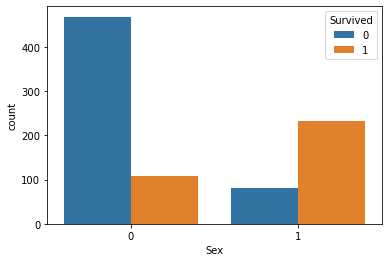

In [26]:
sns.countplot(data=train, x='Sex', hue='Survived')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

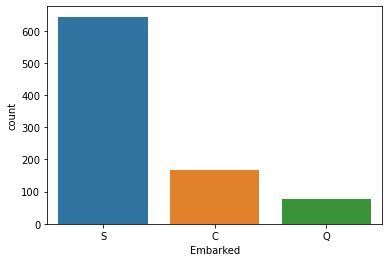

In [27]:
print(train['Embarked'].value_counts())
sns.countplot(data=train, x='Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

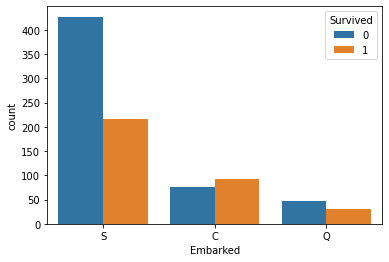

In [28]:
#Embarked 와 Survived 와 관련성
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

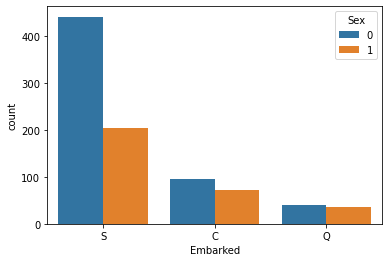

In [29]:
#Embarked 와 Sex 와 관련성
sns.countplot(data=train, x='Embarked', hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

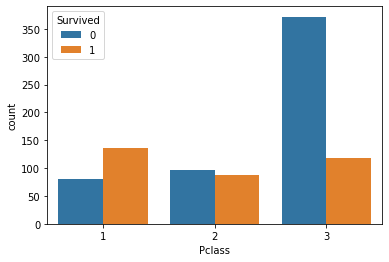

In [30]:
#Pclass 와 Survived 와 관련성
sns.countplot(data=train, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

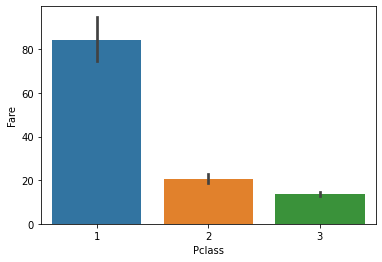

In [31]:
#Pclass와 Fare와 관계
sns.barplot(data=train, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

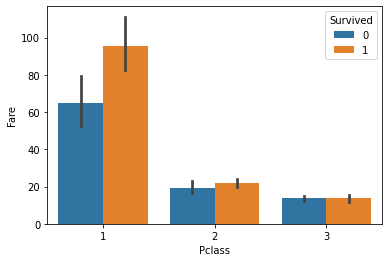

In [32]:
#Pclass와 Fare와 관계, Survived와의 관련성
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

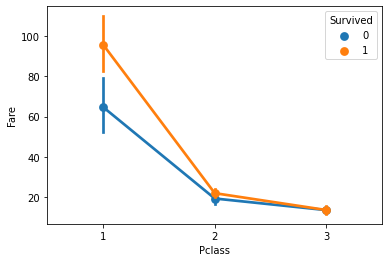

In [33]:
#Pclass와 Fare와 관계, Survived와의 관련성
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\Users\vega2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

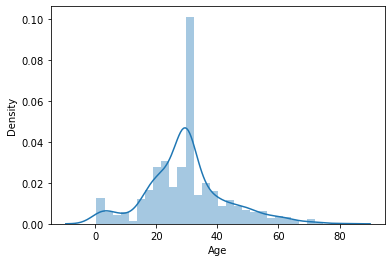

In [34]:
#Age 분포도
sns.distplot(train['Age'], hist=True)

In [35]:
print(train.loc[train['Age'] <= 1,'Age'].count())
train.loc[train['Age'] <= 1].head(3)

14


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,NaN,S,False,True,False
165,0,3,"Panula, Master. Eino Viljami",0,1.00,4,1,3101295,39.6875,NaN,S,False,True,False
173,1,3,"Johnson, Miss. Eleanor Ileen",1,1.00,1,1,347742,11.1333,NaN,S,False,True,False


In [36]:
print(train.loc[train['Age'] >= 70,'Age'].count())
train.loc[train['Age'] >= 70].head(3)

7


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C,True,False,False
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q,False,False,True
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C,True,False,False


C:\Users\vega2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

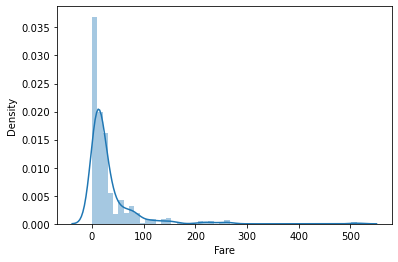

In [37]:
#Fare 분포도
sns.distplot(train['Fare'], hist=True)

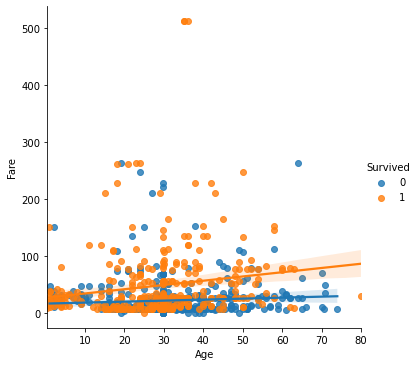

In [38]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

In [39]:
import numpy as np

train['Fare'] = train['Fare'].map(lambda val: np.log(val) if val > 0 else 0)

In [40]:
test['Fare'] = test['Fare'].map(lambda val: np.log(val) if val > 0 else 0)

C:\Users\vega2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

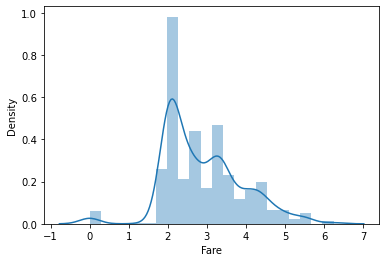

In [41]:
sns.distplot(train['Fare'], hist=True)

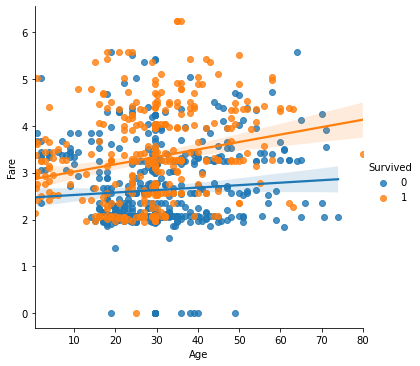

In [42]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

### 4. Feature Engineering
* 훈련데이터 생성
 - 훈련데이터 독립변수 (X_train)
 - 훈련데이터 종속변수 (y_train)
* 테스트데이터 생성
 - 테스트데이터 독립변수(X_test)

In [43]:
feature_names_org = \
['Pclass','Sex','Age','Fare','Embarked_C', 'Embarked_S', 'Embarked_Q']

feature_names = \
['Pclass','Sex','Fare','Embarked_C', 'Embarked_S', 'Embarked_Q']

feature_names

['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [44]:
#훈련데이터 독립변수 
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,1.981001,False,True,False
2,1,1,4.266662,True,False,False
3,3,1,2.070022,False,True,False
4,1,1,3.972177,False,True,False
5,3,0,2.085672,False,True,False


In [45]:
#훈련데이터 종속변수(레이블)
feature_name = 'Survived'
y_train = train[feature_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [46]:
#테스트데이터 독립변수 
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0,2.057860,False,False,True
893,3,1,1.945910,False,True,False
894,2,0,2.270836,False,False,True
895,3,0,2.159003,False,True,False
896,3,1,2.508582,False,True,False


### 5. GridSearchCV를 사용한 하이퍼파라미터 튜닝
* 학습세트 분할
 - 학습세트, 검증세트로 나누기  train_test_split() 
 - sub_input, sub_target
 - val_input, val_target
* 하이퍼파라미터 찾기 - GridSearchCV
* accuracy_score() 함수를 사용해서 점수 확인

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

print(X_train.shape, y_train.shape)
sub_input, val_input, sub_target, val_target = \
train_test_split(X_train, y_train, test_size=0.2, random_state=11 )

print(sub_input.shape, sub_target.shape)
print(val_input.shape, val_target.shape)

model = DecisionTreeClassifier(random_state=11)

params = {
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(5, 20, 1),
    'min_samples_split': range(2,100, 10)
}
grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
#학습
grid.fit(sub_input, sub_target)

print('best parameter ', grid.best_params_)
print('best score', grid.best_score_)
print('mean_test_score', np.max(grid.cv_results_['mean_test_score']))

best_model = grid.best_estimator_
# best model을 사용해서 예측
prediction = best_model.predict(val_input)

#예측한 값과 검증세트의 레이블 을 비교해서 점수를 확인
score = accuracy_score(val_target, prediction)
print(score)

#훈련세트 점수 확인
print(best_model.score(sub_input, sub_target))
#검증세트 점수 확인
print(best_model.score(val_input, val_target))

(891, 6) (891,)
(712, 6) (712,)
(179, 6) (179,)
best parameter  {'max_depth': 12, 'min_impurity_decrease': 0.0009000000000000001, 'min_samples_split': 2}
best score 0.7922288978627007
mean_test_score 0.7922288978627007
0.8603351955307262
0.8707865168539326
0.8603351955307262


* 전체 훈련데이터에 대한 파라미터 찾기

In [49]:
params = {
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(5, 20, 1),
    'min_samples_split': range(2,100, 10)
}

grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

print('best parameter ', grid.best_params_)
print('best score', grid.best_score_)
print('mean_test_score', np.max(grid.cv_results_['mean_test_score']))
score = np.max(grid.cv_results_['mean_test_score'])

best parameter  {'max_depth': 12, 'min_impurity_decrease': 0.0006000000000000001, 'min_samples_split': 2}
best score 0.8226978846274559
mean_test_score 0.8226978846274559


### 6. Model 생성 / 학습 / 예측
* DecisionTreeClassfier 알고리즘 사용
 - max_depth = 5
 * 학습 fit()
 * 예측 predict()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# best parameter  {'max_depth': 12, 'min_impurity_decrease': 0.0009000000000000001, 
# 'min_samples_split': 2}
# best parameter  {'max_depth': 12, 'min_impurity_decrease': 0.0006000000000000001, 
#'min_samples_split': 2}

#모델생성
#model = DecisionTreeClassifier(max_depth=5)
model = DecisionTreeClassifier(max_depth=12, min_impurity_decrease=0.0006000000000000001, \
                            min_samples_split=2)
#학습
model.fit(X_train, y_train)

In [ ]:
#노드를 분할하는데 사용된 중요한 feature 확인
print(feature_names)
model.feature_importances_

In [ ]:
#plot_tree() 사용하여 Model이 학습하는 과정 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#Figure size 조정
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, max_depth=2, \
          feature_names=feature_names)
plt.show()

In [ ]:
#예측하기
prediction = model.predict(X_test)
print(prediction.shape)
prediction

### 7. 제출하기

In [ ]:
submit = pd.read_csv('data/titanic/gender_submission.csv',\
                     index_col='PassengerId')
print(submit.shape)
submit.head(3)

In [ ]:
#submit의 Survived 컬럼에 예측한 값(prediction)을 저장한다
submit['Survived'] = prediction
print(submit.shape)
submit.head()

In [ ]:
#제출할 csv 생성하기
score = np.round(score, 4)
submit.to_csv(f'data/titanic/result_{score}.csv')